# LASSO Regression Model with Standard & Proximal Gradient Descent

### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [78]:
# Read the data.
df = pd.read_excel(r"Concrete_Data.xls")
df

Cement (component 1)(kg in a m^3 mixture)  \
0                                         540.0   
1                                         540.0   
2                                         332.5   
3                                         332.5   
4                                         198.6   
...                                         ...   
1025                                      276.4   
1026                                      322.2   
1027                                      148.5   
1028                                      159.1   
1029                                      260.9   

      Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                   0.0       
1                                                   0.0       
2                                                 142.5       
3                                                 142.5       
4                                                 132.4       
...                                                 ...       
1025                                              116.0       
1026                                                0.0       
1027                                              139.4       
1028                                              186.7       
1029                                              100.5       

      Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   
...                                          ...   
1025                                        90.3   
1026                                       115.6   
1027                                       108.6   
1028                                         0.0   
1029                                        78.3   

      Water  (component 4)(kg in a m^3 mixture)  \
0                                         162.0   
1                                         162.0   
2                                         228.0   
3                                         228.0   
4                                         192.0   
...                                         ...   
1025                                      179.6   
1026                                      196.0   
1027                                      192.7   
1028                                      175.6   
1029                                      200.6   

      Superplasticizer (component 5)(kg in a m^3 mixture)  \
0                                                   2.5     
1                                                   2.5     
2                                                   0.0     
3                                                   0.0     
4                                                   0.0     
...                                                 ...     
1025                                                8.9     
1026                                               10.4     
1027                                                6.1     
1028                                               11.3     
1029                                                8.6     

      Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
0                                                1040.0      
1                                                1055.0      
2                                                 932.0      
3                                                 932.0      
4                                                 978.4      
...                                                 ...      
1025                                              870.1      
1026                                              817.9      
1027                                              892.4      
1028                                         

### Data Preprocessing

#### All the components features' values are in Kg in a m^3 mixture

In [79]:
# Change columns' names
df.rename(columns={"Cement (component 1)(kg in a m^3 mixture)": "Cement", 
                   "Blast Furnace Slag (component 2)(kg in a m^3 mixture)": "Blast Furnace Slag",
                   "Fly Ash (component 3)(kg in a m^3 mixture)": "Fly Ash",
                   "Water  (component 4)(kg in a m^3 mixture)": "Water",
                   "Superplasticizer (component 5)(kg in a m^3 mixture)": "Superplasticizer",
                   "Coarse Aggregate  (component 6)(kg in a m^3 mixture)": "Coarse Aggregate",
                   "Fine Aggregate (component 7)(kg in a m^3 mixture)": "Fine Aggregate",
                   # "Age (day)": "Age (day)",
                   "Concrete compressive strength(MPa, megapascals) ": "Concrete compressive strength (MPa, megapascals)"},
          inplace=True)

df

Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0      540.0                 0.0      0.0  162.0               2.5   
1      540.0                 0.0      0.0  162.0               2.5   
2      332.5               142.5      0.0  228.0               0.0   
3      332.5               142.5      0.0  228.0               0.0   
4      198.6               132.4      0.0  192.0               0.0   
...      ...                 ...      ...    ...               ...   
1025   276.4               116.0     90.3  179.6               8.9   
1026   322.2                 0.0    115.6  196.0              10.4   
1027   148.5               139.4    108.6  192.7               6.1   
1028   159.1               186.7      0.0  175.6              11.3   
1029   260.9               100.5     78.3  200.6               8.6   

      Coarse Aggregate  Fine Aggregate  Age (day)  \
0               1040.0           676.0         28   
1               1055.0           676.0         28   
2                932.0           594.0        270   
3                932.0           594.0        365   
4                978.4           825.5        360   
...                ...             ...        ...   
1025             870.1           768.3         28   
1026             817.9           813.4         28   
1027             892.4           780.0         28   
1028             989.6           788.9         28   
1029             864.5           761.5         28   

      Concrete compressive strength (MPa, megapascals)  
0                                            79.986111  
1                                            61.887366  
2                                            40.269535  
3                                            41.052780  
4                                            44.296075  
...                                                ...  
1025                                         44.284354  
1026                                         31.178794  
1027                                         23.696601  
1028                                         32.768036  
1029                                         32.401235  

[1030 rows x 9 columns]

In [80]:
# Helpful to know the data type of each column as it has to be changed sometimes.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Cement                                            1030 non-null   float64
 1   Blast Furnace Slag                                1030 non-null   float64
 2   Fly Ash                                           1030 non-null   float64
 3   Water                                             1030 non-null   float64
 4   Superplasticizer                                  1030 non-null   float64
 5   Coarse Aggregate                                  1030 non-null   float64
 6   Fine Aggregate                                    1030 non-null   float64
 7   Age (day)                                         1030 non-null   int64  
 8   Concrete compressive strength (MPa, megapascals)  1030 non-null   float64
dtypes: float64(8), int64

In [81]:
# Gives some statistics about the data.
df.describe()

Cement  Blast Furnace Slag      Fly Ash        Water  \
count  1030.000000         1030.000000  1030.000000  1030.000000   
mean    281.165631           73.895485    54.187136   181.566359   
std     104.507142           86.279104    63.996469    21.355567   
min     102.000000            0.000000     0.000000   121.750000   
25%     192.375000            0.000000     0.000000   164.900000   
50%     272.900000           22.000000     0.000000   185.000000   
75%     350.000000          142.950000   118.270000   192.000000   
max     540.000000          359.400000   200.100000   247.000000   

       Superplasticizer  Coarse Aggregate  Fine Aggregate    Age (day)  \
count       1030.000000       1030.000000     1030.000000  1030.000000   
mean           6.203112        972.918592      773.578883    45.662136   
std            5.973492         77.753818       80.175427    63.169912   
min            0.000000        801.000000      594.000000     1.000000   
25%            0.000000        932.000000      730.950000     7.000000   
50%            6.350000        968.000000      779.510000    28.000000   
75%           10.160000       1029.400000      824.000000    56.000000   
max           32.200000       1145.000000      992.600000   365.000000   

       Concrete compressive strength (MPa, megapascals)  
count                                       1030.000000  
mean                                          35.817836  
std                                           16.705679  
min                                            2.331808  
25%                                           23.707115  
50%                                           34.442774  
75%                                           46.136287  
max                                           82.599225

In [82]:
# Check the number of nulls of each column.
df.isna().sum()

Cement                                              0
Blast Furnace Slag                                  0
Fly Ash                                             0
Water                                               0
Superplasticizer                                    0
Coarse Aggregate                                    0
Fine Aggregate                                      0
Age (day)                                           0
Concrete compressive strength (MPa, megapascals)    0
dtype: int64

In [83]:
# Check for duplicates.
df.duplicated().sum()

25

In [84]:
# remove duplicates.
df.drop_duplicates(inplace=True)

df.duplicated().sum()

0

### Exploratory Data Analysis (EDA)

In [85]:
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age (day)',
       'Concrete compressive strength (MPa, megapascals)'],
      dtype='object')

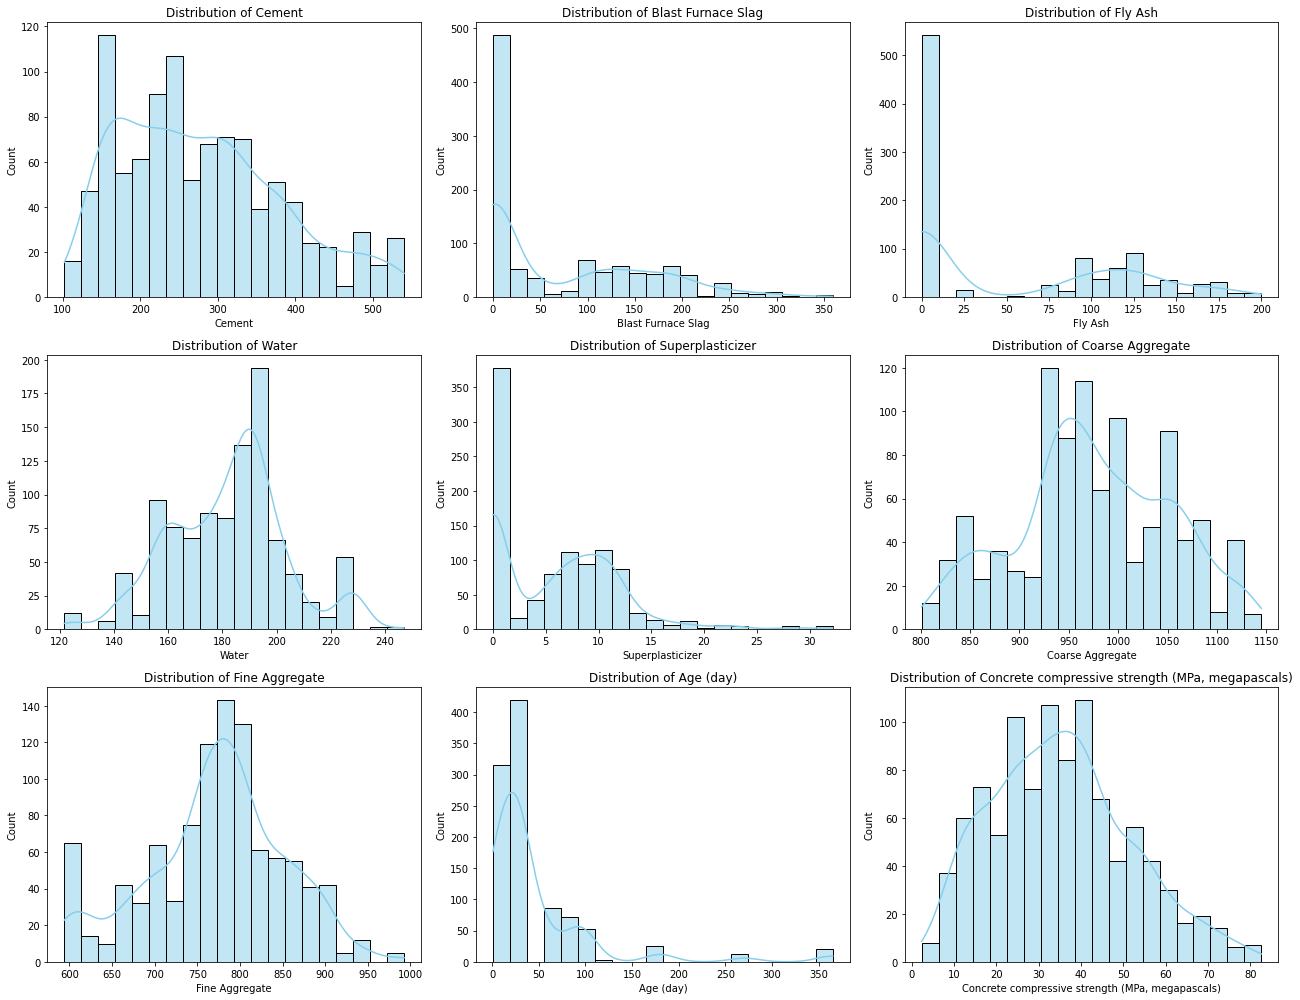

In [86]:
# Set up the matplotlib figure
plt.figure(figsize=(18, 14))

# Loop through each quantitative variable and create a subplot for visualization
for i, var in enumerate(df.columns, 1):
    plt.subplot(3, 3, i)

    # Create a histogram for the current variable
    sns.histplot(data=df, x=var, kde=True, color='skyblue', bins=20)

    plt.title(f'Distribution of {var}')
    # plt.xlabel(var)
    # plt.ylabel('Frequency')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

In [11]:
# df.hist(bins=50, figsize=(18, 14))
# plt.show()

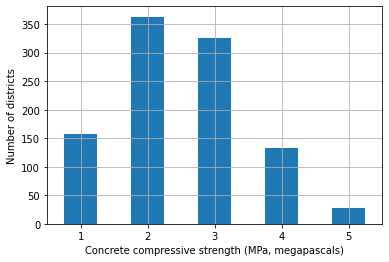

In [87]:
# It is important to have a sufficient number of instances in your dataset for each stratum,
# or else the estimate of a stratum’s importance may be biased. This means that you
# should not have too many strata, and each stratum should be large enough.

# Bin continuous target into quantiles (e.g., 5 bins)
y_binned = pd.cut(df['Concrete compressive strength (MPa, megapascals)'], 
                  bins=[0, 17.5, 35, 52.5, 70, np.inf], 
                  labels=[1, 2, 3, 4, 5])  # Discretize into 5 groups

y_binned.value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Concrete compressive strength (MPa, megapascals)")
plt.ylabel("Number of districts")
plt.show()

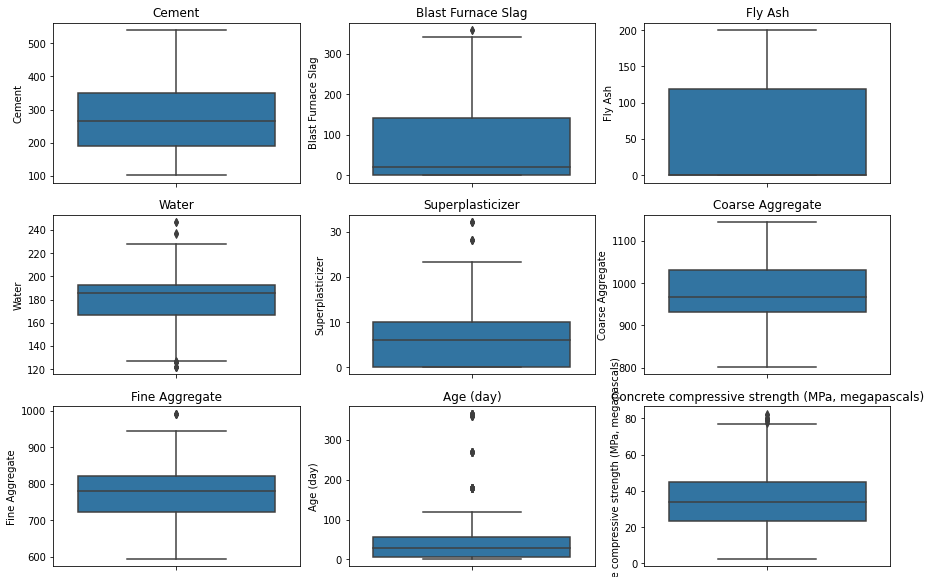

In [88]:
# calc the number of rows needed for the figure
rows_n = len(df.columns) // 3

# figure for box plots of each column to calculate outlier
fig, axes = plt.subplots(nrows=rows_n, ncols=3 , figsize=(15, 10))
axes = axes.ravel()
for i, column in enumerate(df.columns):
    sns.boxplot(data=df, y=column, ax=axes[i])
    axes[i].set_title(column)

plt.show()

Age (day)                                           3.253974
Superplasticizer                                    0.981572
Blast Furnace Slag                                  0.855246
Cement                                              0.564997
Fly Ash                                             0.497324
Concrete compressive strength (MPa, megapascals)    0.395653
Water                                               0.034119
Coarse Aggregate                                   -0.065242
Fine Aggregate                                     -0.252323
dtype: float64


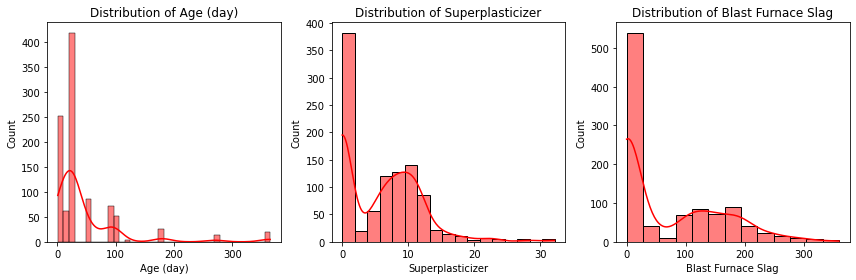

In [99]:
# Assuming df is your concrete dataset
skewness = df.skew().sort_values(ascending=False)
print(skewness)

# Thresholds:
# > 1: Highly skewed → Strong candidate for log transform
# 0.5 to 1: Moderately skewed → Optional log transform

# Set up the matplotlib figure
plt.figure(figsize=(12, 4))

# Plot skewed features
skewed_features = skewness[skewness >= 0.8].index  # Highly skewed
for i, col in enumerate (skewed_features, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], kde=True, color='red')
    plt.title(f'Distribution of {col}')
    
# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

In [100]:
# Only apply log to numerical, positively skewed features
cols_to_log = skewed_features.tolist()

# Make a copy to avoid altering the original
df_log = df.copy(deep=True)

# Apply transformation
for col in cols_to_log:
    df_log[col] = np.log1p(df_log[col])

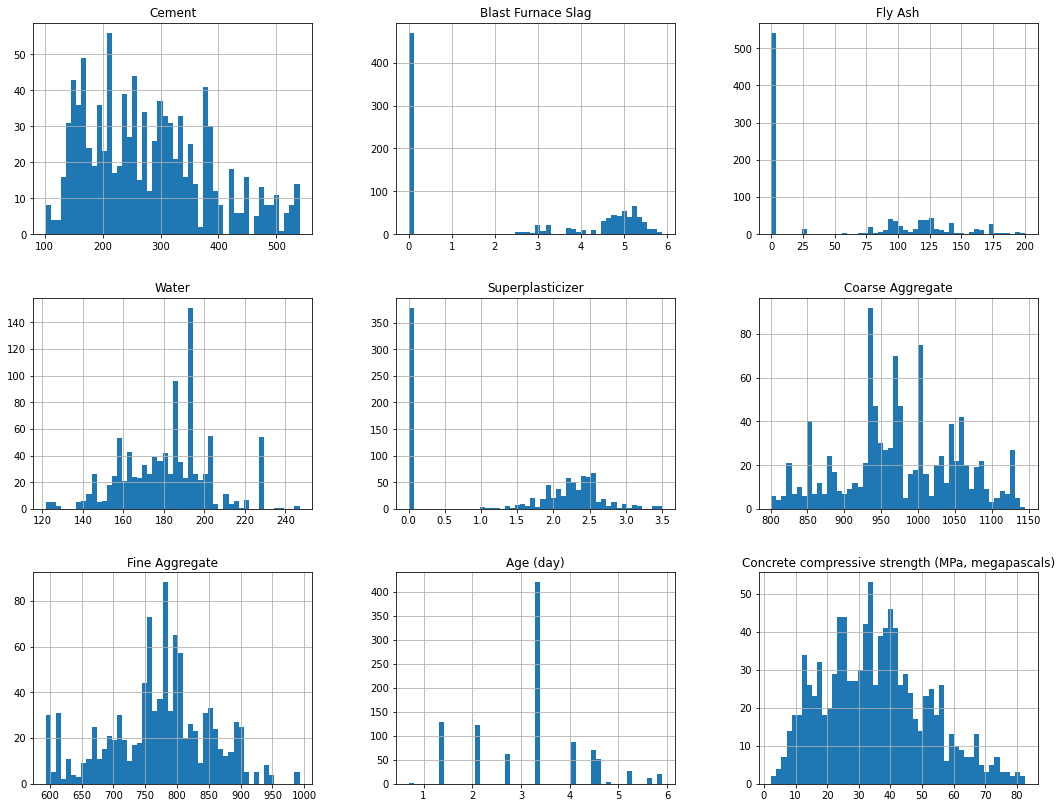

In [101]:
df_log.hist(bins=50, figsize=(18, 14))
plt.show()

In [104]:
from sklearn.model_selection import train_test_split

X = df_log.drop(['Concrete compressive strength (MPa, megapascals)'], axis=1)
y = df_log['Concrete compressive strength (MPa, megapascals)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y_binned, random_state=42)
strat_train_set = pd.concat([X_train, y_train], axis=1)
strat_test_set = pd.concat([X_test, y_test], axis=1)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")
print(f"Shape of strat_train_set: {strat_train_set.shape}")
print(f"Shape of strat_test_set: {strat_test_set.shape}")

Shape of X_train: (703, 8)
Shape of y_train: (703,)
Shape of X_test: (302, 8)
Shape of y_test: (302,)
Shape of strat_train_set: (703, 9)
Shape of strat_test_set: (302, 9)


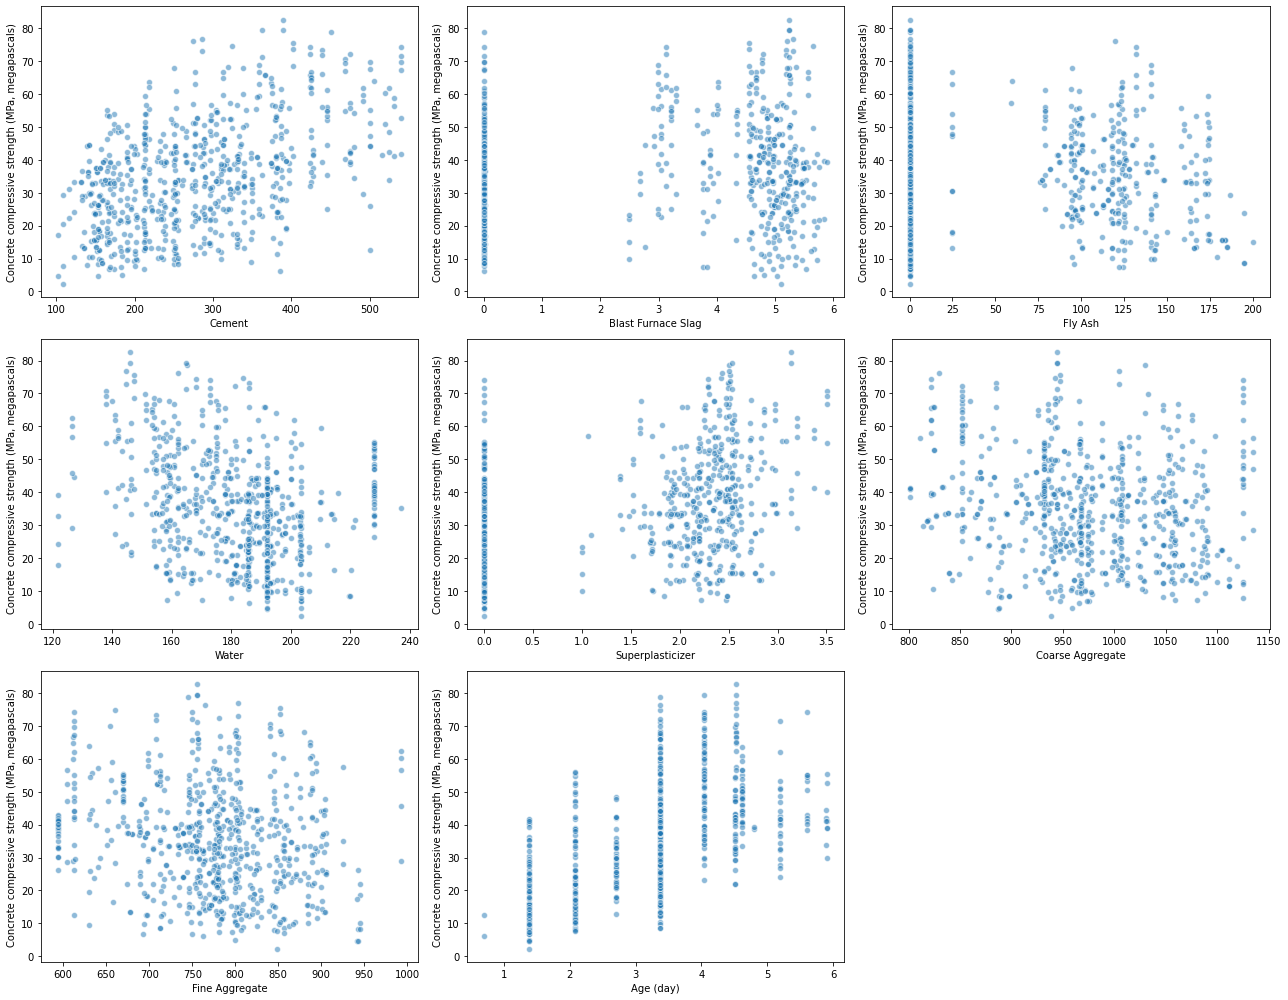

In [105]:
# Create a grid of scatter plots
n_cols = 3                                   # 3 plots per column
n_rows = len(X_train.columns) // n_cols + 1  # 8 // 3 + 1 = 2 + 1 = 3 rows

plt.figure(figsize=(18, 14))
for i, feature in enumerate(X_train.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.scatter(strat_train_set[feature], y_train, alpha=0.5, edgecolors='w')
    plt.xlabel(feature)
    plt.ylabel('Concrete compressive strength (MPa, megapascals)')
    # plt.title(f"{feature} vs. Concrete compressive strength (MPa, megapascals)")

plt.tight_layout()
plt.show()

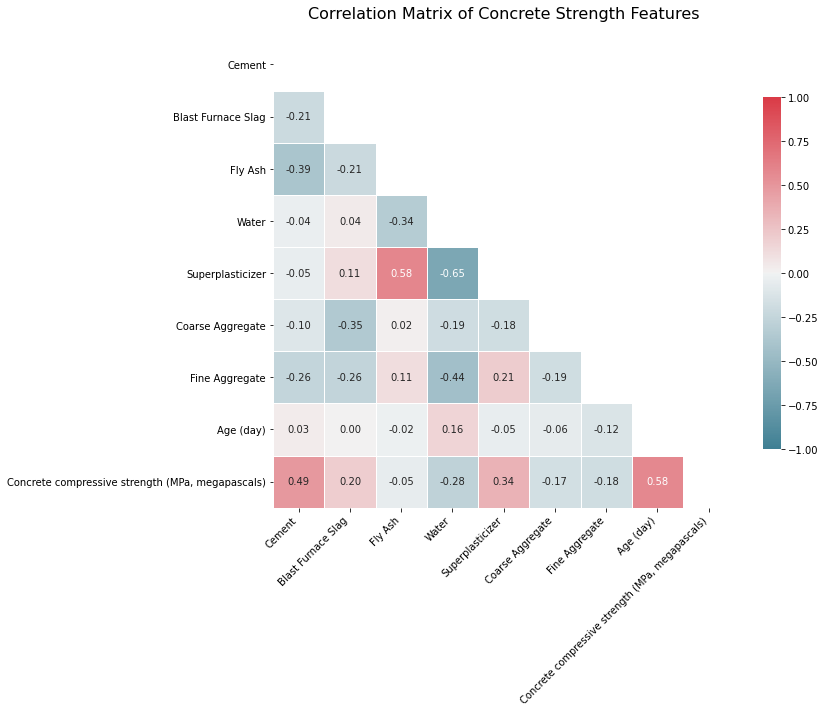

In [106]:
# Calculate correlation matrix
corr_matrix = strat_train_set.corr()

# Create heatmap with improved styling
plt.figure(figsize=(12, 10))

# Create mask for upper triangle (optional)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Custom color palette
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Plot heatmap
heatmap = sns.heatmap(
    corr_matrix,
    mask=mask,                # Hide upper triangle if desired
    cmap=cmap,
    vmin=-1, vmax=1,         # Fix color range for correlations
    center=0,                # Center white at 0
    annot=True,              # Show correlation values
    fmt=".2f",              # Format to 2 decimal places
    linewidths=.5,           # Add grid lines
    cbar_kws={"shrink": .75} # Adjust colorbar size
)

# Improve readability
plt.title("Correlation Matrix of Concrete Strength Features", pad=20, fontsize=16)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)

plt.tight_layout()
plt.show()

### Compute Cost

## Lasso Regression (L1 Regularized Linear Regression)

Lasso regression is a linear regression variant that performs both **variable selection** and **regularization** through an L1 penalty. The inclusion of a bias term (`b`) makes the model more flexible by accounting for offsets in the target variable.

### Mathematical Formulation

The objective function combines:

1. **Mean Squared Error (MSE)**:
   $$
   \text{MSE} = \frac{1}{2m}\sum_{i=1}^{m}\left(y_i - (\mathbf{x}_i^\top\mathbf{w} + b)\right)^2
   $$

2. **L1 Penalty Term**:
   $$
   \text{L1} = \lambda\sum_{j=1}^{n}|w_j|
   $$

Complete cost function:
$$
J(\mathbf{w}, b) = \underbrace{\frac{1}{2m}\sum_{i=1}^{m}\left(y_i - (\mathbf{x}_i^\top\mathbf{w} + b)\right)^2}_{\text{MSE}} + \underbrace{\lambda\sum_{j=1}^{n}|w_j|}_{\text{L1 Penalty}}
$$

### Key Components:
- $\mathbf{w}$: Weight vector $(w_1, w_2, \dots, w_n)^\top$
- $b$: Bias term (scalar)
- $m$: Number of training examples
- $n$: Number of features
- $\lambda$: Regularization strength
- $|\cdot|$: Absolute value function

### Properties:
1. **Sparsity**: Induces exactly zero weights for some features
2. **Shrinkage**: Shrinks all coefficients toward zero
3. **Feature Selection**: Automatically performs feature selection

### Critical Notes:
1. The bias term $b$ is $\text{not}$ regularized
2. Predictions are computed as $\hat{y} = \mathbf{X}\mathbf{w} + b\mathbf{1}$
3. Only weights $\mathbf{w}$ contribute to the L1 penalty

In [107]:
def lasso_cost(X, y, w, b, lambda_=1.0):
    """
    Compute the Lasso Regression cost function.

    Parameters:
        X (np.ndarray): Shape (m_samples, n_features) Features matrix
        y (np.ndarray): Shape (m_samples,) Label/Target vector (Actual strength of concrete)
        w (np.ndarray): Shape (n_features,) Weight vector (Parameters of the model)
        b (float): Bias term
        lambda_ (float): L1 regularization strength (Hyperparameter)

    Returns:
        float: The Lasso cost
    """
    # Number of training examples
    m = X.shape[0]
    
    # Predictions
    y_pred = X @ w + b
    
    # MSE part
    mse = (1 / (2 * m)) * np.sum((y_pred - y) ** 2)
    
    # L1 Regularization part
    l1_penalty = lambda_ * np.sum(np.abs(w))
    
    return mse + l1_penalty


##### Evaluation Metrics

In [108]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_regression_metrics(X, y, w, b):
    y_pred = X @ w + b
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    
    return mse, mae, r2


### Compute gradient

#### (i) Standard Gradient Descent (Without L1 Regularization)

## Standard Gradient Descent for Linear Regression

Standard gradient descent minimizes the ordinary least squares (OLS) objective function without regularization.

### Mathematical Formulation

Objective function (MSE):
$$
J(\mathbf{w}, b) = \frac{1}{2m}\sum_{i=1}^{m}(y_i - (\mathbf{x}_i^T\mathbf{w} + b))^2
$$

Gradient update rules:
$$
\begin{aligned}
\mathbf{w}^{(t+1)} &= \mathbf{w}^{(t)} - \alpha \nabla_\mathbf{w} J(\mathbf{w}^{(t)}, b^{(t)}) \\
b^{(t+1)} &= b^{(t)} - \alpha \nabla_b J(\mathbf{w}^{(t)}, b^{(t)})
\end{aligned}
$$

Where the gradients are:
$$
\begin{aligned}
\nabla_\mathbf{w} J &= \frac{1}{m}\mathbf{X}^T(\mathbf{X}\mathbf{w} + b\mathbf{1} - \mathbf{y}) \\
\nabla_b J &= \frac{1}{m}\mathbf{1}^T(\mathbf{X}\mathbf{w} + b\mathbf{1} - \mathbf{y})
\end{aligned}
$$

### Algorithm Steps:
1. Initialize weights $\mathbf{w} = \mathbf{0}$ and bias $b = 0$
2. Repeat until convergence:
   - Compute predictions: $\hat{\mathbf{y}} = \mathbf{X}\mathbf{w} + b\mathbf{1}$
   - Compute gradients:
     - $\nabla_\mathbf{w} J = \frac{1}{m}\mathbf{X}^T(\hat{\mathbf{y}} - \mathbf{y})$
     - $\nabla_b J = \frac{1}{m}\mathbf{1}^T(\hat{\mathbf{y}} - \mathbf{y})$
   - Update parameters:
     - $\mathbf{w} \leftarrow \mathbf{w} - \alpha\nabla_\mathbf{w} J$
     - $b \leftarrow b - \alpha\nabla_b J$
   - Check convergence: 
     - $\|\mathbf{w}^{(new)} - \mathbf{w}^{(old)}\|_2 < \epsilon$ 
     - $|b^{(new)} - b^{(old)}| < \epsilon$

### Key Parameters:
- $\alpha$: Learning rate
- $\epsilon$: Convergence tolerance
- $m$: Number of training examples
- $b$: Bias term (scalar intercept)

In [109]:
import math

def gradient_descent(X, y, alpha=0.01, num_iters=1000, epsilon=1e-4):
    """
    Compute the gradient for the smooth part of the Lasso Regression function. Performs batch
    gradient descent to learn models' parameters. Update parameters by taking
    num_iters gradient steps with learning rate alpha.

    Parameters:
        X (np.ndarray): Shape (m_samples, n_features) Features matrix
        y (np.ndarray): Shape (m_samples,) Label/Target vector (Actual strength of concrete)
        alpha (float): Learning rate (Hyperparameter)
        num_iters (int): number of iterations (epochs) to run gradient descent
        epsilon (float): Tolerance factor which if the difference between updates is less than, function returns
        
    Returns:
        w (np.ndarray): Updated values of parameters of the model after running gradient descent
        b (float): Updated learned bias
        losses (list): Values of loss through the iterations
        mse_list: Mean squared error over epochs
    """
    m, n = X.shape
    w = np.zeros(X.shape[1])
    b = 0.0
    
    # Record loss and evaluation metrics for graphing
    losses = []
    mse_list = []
    
    for i in range(num_iters):
        w_old = w.copy()
        b_old = b
        
        y_pred = X @ w + b
        grad_w = (1 / m) * X.T @ (y_pred - y)
        grad_b = (1 / m) * np.sum(y_pred - y)
        
        w -= alpha * grad_w
        b -= alpha * grad_b
        
        # Cost (no L1 regularization here), so that 0 set to the parameter lambda to cancel its affect!
        loss = lasso_cost(X, y, w, b, 0)
        losses.append(loss)
        
        # Compute accuracy metrics
        mse, _, _ = evaluate_regression_metrics(X, y, w, b)
        mse_list.append(mse)
        
        # Computes the relative change, for more numerical stability (avoiding division 
        # by zero), using the Euclidean norm (L2 norm) of the weight difference
        if np.linalg.norm(w - w_old) / (np.linalg.norm(w_old) + 1e-8) < epsilon and abs(b - b_old) < epsilon:
            break
    
    
    return w, b, losses, mse_list


#### (ii) Proximal Gradient Descent (With L1 Regularization)

## Proximal Gradient Descent for Lasso Regression

Proximal gradient descent handles the non-differentiable L1 penalty by decomposing the optimization into smooth and non-smooth parts.

### Mathematical Formulation

Objective function:
$$
J(\mathbf{w}, b) = \underbrace{\frac{1}{2m}\|\mathbf{y} - (\mathbf{X}\mathbf{w} + b\mathbf{1})\|_2^2}_{\text{Smooth part}} + \underbrace{\lambda\|\mathbf{w}\|_1}_{\text{Non-smooth part}}
$$

Update consists of three steps:
1. Gradient step (weights):
$$
\mathbf{v} = \mathbf{w}^{(t)} - \alpha \nabla_\mathbf{w} J_{\text{smooth}}(\mathbf{w}^{(t)}, b^{(t)})
$$

2. Proximal (soft thresholding) step:
$$
w_j^{(t+1)} = \text{sign}(v_j)\max(|v_j| - \alpha\lambda, 0)
$$

3. Bias update step:
$$
b^{(t+1)} = b^{(t)} - \alpha \nabla_b J_{\text{smooth}}(\mathbf{w}^{(t)}, b^{(t)})
$$

### Algorithm Steps:
1. Initialize weights $\mathbf{w} = \mathbf{0}$ and bias $b = 0$
2. Repeat until convergence:
   - Gradient steps:
     - $\mathbf{v} = \mathbf{w} - \frac{\alpha}{m}\mathbf{X}^T(\mathbf{X}\mathbf{w} + b\mathbf{1} - \mathbf{y})$
     - $b \leftarrow b - \frac{\alpha}{m}\mathbf{1}^T(\mathbf{X}\mathbf{w} + b\mathbf{1} - \mathbf{y})$
   - Proximal step: 
     - $w_j = \text{sign}(v_j)\max(|v_j| - \alpha\lambda, 0)$ (for each weight)
   - Check convergence:
     - $\|\mathbf{w}^{(new)} - \mathbf{w}^{(old)}\|_2 < \epsilon$
     - $|b^{(new)} - b^{(old)}| < \epsilon$

### Key Differences from Standard GD:
1. Additional soft thresholding step for weights
2. Explicit bias term update (not regularized)
3. Produces sparse solutions (exact zeros in weights)
4. Maintains separate treatment:
   - Weights: Regularized (L1 penalty)
   - Bias: Unregularized

In [110]:
# import math

# def soft_threshold(z, gamma):
#     return np.sign(z) * np.maximum(np.abs(z) - gamma, 0)

def proximal_descent(X, y, alpha=0.01, lambda_=1.0, num_iters=1000, epsilon=1e-4):
    """
    Compute the proximal gradient for the Lasso Regression function. Performs batch gradient
    descent on the smooth part to learn models' parameters. Update parameters by taking
    num_iters gradient steps with learning rate alpha. Pass the updated parameters
    to the proximal (soft threshold) to update them.

    Parameters:
        X (np.ndarray): Shape (m_samples, n_features) Features matrix
        y (np.ndarray): Shape (m_samples,) Label/Target vector (Actual strength of concrete)
        alpha (float): Learning rate (Hyperparameter)
        num_iters (int): number of iterations (epochs) to run gradient descent
        epsilon (float): Tolerance factor which if the difference between updates is less than, function returns
        
    Returns:
        w (np.ndarray): Updated values of parameters of the model after running proximal gradient descent
        b (float): Updated learned bias
        losses (list): Values of loss through the iterations
        mse_list: Mean squared error over epochs
    """
    m, n = X.shape
    w = np.zeros(X.shape[1])
    b = 0.0
    
    # Record loss and evaluation metrics for graphing
    losses = []
    mse_list = []
    
    for i in range(num_iters):
        w_old = w.copy()
        b_old = b
        
        y_pred = X @ w + b
        grad_w = (1 / m) * X.T @ (y_pred - y)
        grad_b = (1 / m) * np.sum(y_pred - y)
        
        w -= alpha * grad_w    # Gradient descent step for weights
        b -= alpha * grad_b    # Bias update (no proximal step)
        
        # passing the uppdated w to the proximal (soft threshold)
        w = np.sign(w) * np.maximum(np.abs(w) - alpha * lambda_, 0)

        loss = lasso_cost(X, y, w, b, lambda_)
        losses.append(loss)
        
        # Compute accuracy metrics
        mse, _, _ = evaluate_regression_metrics(X, y, w, b)
        mse_list.append(mse)
        
        # Computes the relative change, for more numerical stability (avoiding division 
        # by zero), using the Euclidean norm (L2 norm) of the weight difference
        if np.linalg.norm(w - w_old) / (np.linalg.norm(w_old) + 1e-8) < epsilon and abs(b - b_old) < epsilon:
            break
        
    return w, b, losses, mse_list


##### Convergence Speed

In [111]:
def get_convergence_speed(losses, epsilon=1e-4):
    """
    Gives the number of iterations needed to converge.
    
    Parameters:
        losses (np.ndarray): 1-D array of the loss values through the epochs.
        epsilon (float): Tolerance factor which if the difference between losses is less than, function returns i, the iter num.
        
    Returns:
        i, the iteration number, if the difference between two losses is less than epsilon. Or returns the length
        of the losses itself if no difference was less than epsilon.
    """
    for i in range(1, len(losses)):
        if abs(losses[i] - losses[i-1]) < epsilon:
            return i
        
    return len(losses)


###### Scaling the data

In [21]:
# from sklearn.preprocessing import StandardScaler

# standard_scaler = StandardScaler()
# X_train_scaled = standard_scaler.fit_transform(X_train)
# # y_train_scaled = y_train

In [112]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()
X_train_scaled = robust_scaler.fit_transform(X_train)

###### For Standard Gradient Descent (no λ):

In [151]:
# import warnings
# warnings.filterwarnings('ignore')

# Train grad model
w_gd, b_gd, losses_gd, mse_train_gd = gradient_descent(X_train_scaled, y_train, alpha=1, num_iters=1000)

# Print cost every at intervals of 10 times or as many iteraions if < 10
num_iters = len(losses_gd)
for i in range(num_iters):
    if i % math.ceil(num_iters / 10) == 0:
        print(f"Iter {i:4d} | Loss: {losses_gd[i]:.4f} | MSE: {mse_train_gd[i]:.4f}")

print(f"w and b found by gradient descent are: w={w_gd}, b={b_gd}")

Iter    0 | Loss: 180.1393 | MSE: 360.2786
Iter   16 | Loss: 26.9408 | MSE: 53.8815
Iter   32 | Loss: 25.9777 | MSE: 51.9553
Iter   48 | Loss: 25.7302 | MSE: 51.4605
Iter   64 | Loss: 25.6643 | MSE: 51.3286
Iter   80 | Loss: 25.6458 | MSE: 51.2917
Iter   96 | Loss: 25.6403 | MSE: 51.2806
Iter  112 | Loss: 25.6385 | MSE: 51.2769
Iter  128 | Loss: 25.6378 | MSE: 51.2756
Iter  144 | Loss: 25.6375 | MSE: 51.2751
w and b found by gradient descent are: w=[13.34239576  9.97961449  1.74585537 -5.3214376   5.74159608 -0.17866059
 -1.03737104 17.25873974], b=36.73527336442104


###### For Proximal Gradient Descent (with λ):

In [152]:
# Train proximal model # alpha = 0.005, lambda = 0.001
w_prox, b_prox, losses_prox, mse_train_prox = proximal_descent(X_train_scaled, y_train, alpha=1, lambda_=0.01, num_iters=1000)

# Print cost every at intervals of 10 times or as many iteraions if < 10
num_iters = len(losses_prox)
for i in range(num_iters):
    if i % math.ceil(num_iters / 10) == 0:
       print(f"Iter {i:4d} | Loss: {losses_prox[i]:.4f} | Train MSE: {mse_train_prox[i]:.4f}")

print(f"w and b found by proximal descent are: w={w_prox}, b={b_prox}")

Iter    0 | Loss: 180.4537 | Train MSE: 359.9708
Iter   16 | Loss: 27.4383 | Train MSE: 53.7864
Iter   32 | Loss: 26.5092 | Train MSE: 51.9337
Iter   48 | Loss: 26.2712 | Train MSE: 51.4596
Iter   64 | Loss: 26.2080 | Train MSE: 51.3331
Iter   80 | Loss: 26.1904 | Train MSE: 51.2971
Iter   96 | Loss: 26.1852 | Train MSE: 51.2858
Iter  112 | Loss: 26.1835 | Train MSE: 51.2816
Iter  128 | Loss: 26.1829 | Train MSE: 51.2798
Iter  144 | Loss: 26.1826 | Train MSE: 51.2789
w and b found by proximal descent are: w=[13.24300184  9.84417157  1.62058889 -5.34243308  5.77051404 -0.20863802
 -1.07256348 17.22606254], b=36.784556924923834


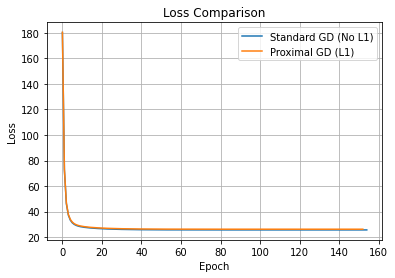

In [153]:
# Plot comparison
plt.plot(losses_gd, label='Standard GD (No L1)')
plt.plot(losses_prox, label='Proximal GD (L1)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Comparison')
plt.legend()
plt.grid(True)
plt.show()

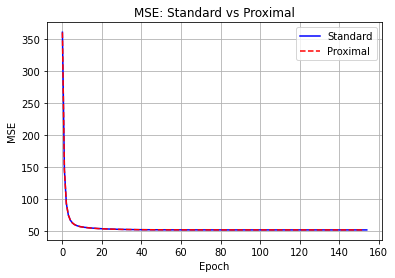

In [154]:
# --- MSE Comparison ---
plt.plot(mse_train_gd, label="Standard", color='blue', linestyle='-')
plt.plot(mse_train_prox, label="Proximal", color='red', linestyle='--')
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title("MSE: Standard vs Proximal")
plt.legend()
plt.grid(True)
plt.show()

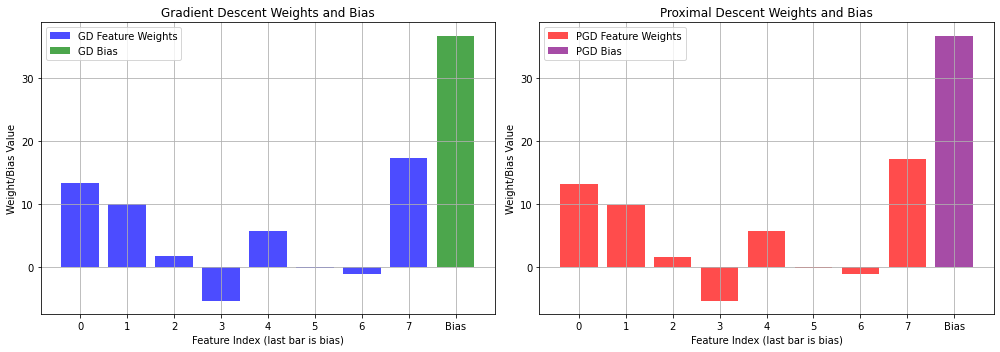

In [155]:
# Create a 1x2 subplot grid
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))  # Slightly wider figure

# --- Subplot 1: Standard Gradient Descent Weights and Bias ---
# Plot feature weights
ax1.bar(
    np.arange(len(w_gd)), 
    w_gd.flatten(), 
    color='blue',
    alpha=0.7,
    label='GD Feature Weights'
)
# Plot bias as a special bar
ax1.bar(
    len(w_gd),  # Position after feature weights
    b_gd,       # Bias value
    color='green',
    alpha=0.7,
    label='GD Bias'
)
ax1.set_title("Gradient Descent Weights and Bias")
ax1.set_xlabel("Feature Index (last bar is bias)")
ax1.set_ylabel("Weight/Bias Value")
ax1.grid(True)
ax1.set_xticks(np.arange(len(w_gd) + 1))  # Include xtick for bias
ax1.set_xticklabels(list(np.arange(len(w_gd))) + ['Bias'])

# --- Subplot 2: Proximal Gradient Descent Weights and Bias ---
# Plot feature weights
ax2.bar(
    np.arange(len(w_prox)), 
    w_prox.flatten(), 
    color='red',
    alpha=0.7,
    label='PGD Feature Weights'
)
# Plot bias as a special bar
ax2.bar(
    len(w_prox),  # Position after feature weights
    b_prox,       # Bias value
    color='purple',
    alpha=0.7,
    label='PGD Bias'
)
ax2.set_title("Proximal Descent Weights and Bias")
ax2.set_xlabel("Feature Index (last bar is bias)")
ax2.set_ylabel("Weight/Bias Value")
ax2.grid(True)
ax2.set_xticks(np.arange(len(w_prox) + 1))  # Include xtick for bias
ax2.set_xticklabels(list(np.arange(len(w_prox))) + ['Bias'])

# Add legends
ax1.legend()
ax2.legend()

# Adjust layout and display
plt.tight_layout()
plt.show()

In [156]:
# Scale the test set
X_test_scaled = robust_scaler.transform(X_test)

# Predict using the two methods
y_pred_gd = X_test_scaled @ w_gd + b_gd
y_pred_prox = X_test_scaled @ w_prox + b_prox

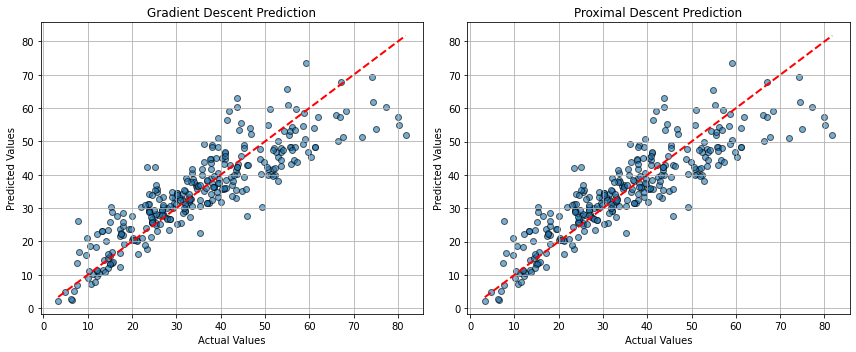

In [157]:
# Create a 1x2 subplot grid
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# --- Subplot 1: Standard Gradient Descent Predictions ---
ax1.scatter(y_test, y_pred_gd, alpha=0.6, edgecolor='k')
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax1.set_xlabel("Actual Values")
ax1.set_ylabel("Predicted Values")
ax1.set_title("Gradient Descent Prediction")
ax1.grid(True)

# --- Subplot 2: Proximal Gradient Descent Predictions ---
ax2.scatter(y_test, y_pred_prox, alpha=0.6, edgecolor='k')
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax2.set_xlabel("Actual Values")
ax2.set_ylabel("Predicted Values")
ax2.set_title("Proximal Descent Prediction")
ax2.grid(True)

# Adjust layout and display
plt.tight_layout()
plt.show()

In [158]:
mse_test_gd, mae_test_gd, r2_test_gd = evaluate_regression_metrics(X_test_scaled, y_test, w_gd, b_gd)
mse_test_prox, mae_test_prox, r2_test_prox = evaluate_regression_metrics(X_test_scaled, y_test, w_prox, b_prox)

print("Gradient Descent (GD):")
print('----------------------')
print("R² Score:", round(r2_test_gd, 4))
print("MAE:", round(mae_test_gd, 4))
print("Training MSE:", round(mse_train_gd[-1], 4))
print("Validation MSE:", round(mse_test_gd, 4))
print("Convergence Epoch:", get_convergence_speed(losses_gd))
print("Non-zero Weights:", np.count_nonzero(w_gd))

print('\n=======================================')

print("\nProximal Gradient Descent (PGD with L1)")
print('---------------------------------------')
print("R² Score:", round(r2_test_prox, 4))
print("MAE:", round(mae_test_prox, 4))
print("Training MSE:", round(mse_train_prox[-1], 4))
print("Validation MSE:", round(mse_test_prox, 4))
print("Convergence Epoch:", get_convergence_speed(losses_prox))
print("Non-zero Weights:", np.count_nonzero(w_prox))

Gradient Descent (GD):
----------------------
R² Score: 0.7788
MAE: 5.7322
Training MSE: 51.2749
Validation MSE: 57.4002
Convergence Epoch: 106
Non-zero Weights: 8


Proximal Gradient Descent (PGD with L1)
---------------------------------------
R² Score: 0.7788
MAE: 5.7316
Training MSE: 51.2786
Validation MSE: 57.4
Convergence Epoch: 105
Non-zero Weights: 8


#### Create a simple quadratic function for demonstration

In [164]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define a simple quadratic function for demonstration
def quadratic_function(x):
    return x**2 + 2*x + 3

# Its gradient
def quadratic_gradient(x):
    return 2*x + 2

# Proximal operator for L1 regularization (LASSO)
def proximal_operator(x, alpha):
    return np.sign(x) * np.maximum(np.abs(x) - alpha, 0)

#### Create an animation for gradient descent

In [165]:
def gradient_descent_animation():
    # Parameters
    learning_rate = 0.1
    n_iterations = 20
    x_init = 5  # Starting point
    
    # Store optimization path
    x_path = [x_init]
    y_path = [quadratic_function(x_init)]
    
    # Run gradient descent
    x = x_init
    for _ in range(n_iterations):
        grad = quadratic_gradient(x)
        x = x - learning_rate * grad
        x_path.append(x)
        y_path.append(quadratic_function(x))
    
    # Create animation
    fig = go.Figure()
    
    # Create function plot
    x_vals = np.linspace(-6, 6, 100)
    y_vals = quadratic_function(x_vals)
    fig.add_trace(go.Scatter(x=x_vals, y=y_vals, mode='lines', name='Function'))
    
    # Add optimization path
    fig.add_trace(go.Scatter(x=x_path, y=y_path, mode='markers+lines', 
                          name='Optimization Path', line=dict(color='red')))
    
    # Add frames for animation
    frames = []
    for i in range(len(x_path)):
        frames.append(go.Frame(
            data=[go.Scatter(x=[x_path[i]], y=[y_path[i]], 
                           mode='markers', marker=dict(color='green', size=10))],
            name=f'frame{i}'
        ))
    
    fig.frames = frames
    
    # Animation controls
    sliders = [{
        'steps': [{'args': [[f.name], {'frame': {'duration': 300, 'redraw': True},
                                      'mode': 'immediate',
                                      'transition': {'duration': 300}}],
                   'label': str(i),
                   'method': 'animate'} for i, f in enumerate(fig.frames)],
        'transition': {'duration': 300},
        'x': 0.1, 'y': 0,
        'currentvalue': {'font': {'size': 12}, 'prefix': 'Iteration: ', 'visible': True}
    }]
    
    # Layout settings
    fig.update_layout(
        title='Gradient Descent Optimization',
        xaxis_title='x',
        yaxis_title='f(x)',
        sliders=sliders,
        updatemenus=[{
            'type': 'buttons',
            'buttons': [
                {
                    'args': [None, {'frame': {'duration': 500, 'redraw': True}, 
                                   'fromcurrent': True, 
                                   'transition': {'duration': 300}}],
                    'label': 'Play',
                    'method': 'animate'
                },
                {
                    'args': [[None], {'frame': {'duration': 0, 'redraw': True}, 
                                    'mode': 'immediate',
                                    'transition': {'duration': 0}}],
                    'label': 'Pause',
                    'method': 'animate'
                }
            ],
            'direction': 'left',
            'pad': {'r': 10, 't': 87},
            'showactive': False,
            'type': 'buttons',
            'x': 0.1,
            'xanchor': 'right',
            'y': 0,
            'yanchor': 'top'
        }]
    )
    
    return fig

# Show the animation
gradient_descent_animation().show()

#### Create an animation for proximal gradient descent (for LASSO)

In [166]:
def proximal_gradient_descent_animation():
    # Parameters
    learning_rate = 0.1
    alpha = 0.5  # L1 regularization parameter
    n_iterations = 20
    x_init = 5  # Starting point
    
    # Store optimization path
    x_path = [x_init]
    y_path = [quadratic_function(x_init)]
    
    # Run proximal gradient descent
    x = x_init
    for _ in range(n_iterations):
        # Gradient step
        grad = quadratic_gradient(x)
        x_temp = x - learning_rate * grad
        
        # Proximal step (for L1 regularization)
        x = proximal_operator(x_temp, learning_rate * alpha)
        
        x_path.append(x)
        y_path.append(quadratic_function(x))
    
    # Create animation
    fig = go.Figure()
    
    # Create function plot
    x_vals = np.linspace(-6, 6, 100)
    y_vals = quadratic_function(x_vals)
    fig.add_trace(go.Scatter(x=x_vals, y=y_vals, mode='lines', name='Function'))
    
    # Add optimization path
    fig.add_trace(go.Scatter(x=x_path, y=y_path, mode='markers+lines', 
                          name='Optimization Path', line=dict(color='red')))
    
    # Add frames for animation
    frames = []
    for i in range(len(x_path)):
        frames.append(go.Frame(
            data=[go.Scatter(x=[x_path[i]], y=[y_path[i]], 
                           mode='markers', marker=dict(color='green', size=10))],
            name=f'frame{i}'
        ))
    
    fig.frames = frames
    
    # Animation controls
    sliders = [{
        'steps': [{'args': [[f.name], {'frame': {'duration': 300, 'redraw': True},
                                      'mode': 'immediate',
                                      'transition': {'duration': 300}}],
                   'label': str(i),
                   'method': 'animate'} for i, f in enumerate(fig.frames)],
        'transition': {'duration': 300},
        'x': 0.1, 'y': 0,
        'currentvalue': {'font': {'size': 12}, 'prefix': 'Iteration: ', 'visible': True}
    }]
    
    # Layout settings
    fig.update_layout(
        title='Proximal Gradient Descent (LASSO) Optimization',
        xaxis_title='x',
        yaxis_title='f(x)',
        sliders=sliders,
        updatemenus=[{
            'type': 'buttons',
            'buttons': [
                {
                    'args': [None, {'frame': {'duration': 500, 'redraw': True}, 
                                   'fromcurrent': True, 
                                   'transition': {'duration': 300}}],
                    'label': 'Play',
                    'method': 'animate'
                },
                {
                    'args': [[None], {'frame': {'duration': 0, 'redraw': True}, 
                                    'mode': 'immediate',
                                    'transition': {'duration': 0}}],
                    'label': 'Pause',
                    'method': 'animate'
                }
            ],
            'direction': 'left',
            'pad': {'r': 10, 't': 87},
            'showactive': False,
            'type': 'buttons',
            'x': 0.1,
            'xanchor': 'right',
            'y': 0,
            'yanchor': 'top'
        }]
    )
    
    return fig

# Show the animation
proximal_gradient_descent_animation().show()

#### For concrete compressive strength data

In [167]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Prepare your data
X = df.drop('Concrete compressive strength (MPa, megapascals)', axis=1)
y = df['Concrete compressive strength (MPa, megapascals)']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a LASSO path animation
def lasso_path_animation():
    alphas = np.logspace(-4, 2, 100)
    coefs = []
    
    for a in alphas:
        lasso = Lasso(alpha=a, max_iter=10000)
        lasso.fit(X_scaled, y)
        coefs.append(lasso.coef_)
    
    coefs = np.array(coefs)
    
    fig = go.Figure()
    
    # Add a trace for each feature
    for i in range(coefs.shape[1]):
        fig.add_trace(go.Scatter(x=alphas, y=coefs[:, i], 
                      name=X.columns[i], mode='lines'))
    
    # Add frames for animation
    frames = []
    for i, alpha in enumerate(alphas):
        frames.append(go.Frame(
            data=[go.Scatter(x=[alpha]*coefs.shape[1], y=coefs[i, :],
                 mode='markers', marker=dict(color='black', size=8))],
            name=f'frame{i}'
        ))
    
    fig.frames = frames
    
    # Animation controls
    sliders = [{
        'steps': [{'args': [[f.name], {'frame': {'duration': 300, 'redraw': True},
                                      'mode': 'immediate',
                                      'transition': {'duration': 300}}],
                   'label': f'{alphas[i]:.2e}',
                   'method': 'animate'} for i, f in enumerate(fig.frames)],
        'transition': {'duration': 300},
        'x': 0.1, 'y': 0,
        'currentvalue': {'font': {'size': 12}, 'prefix': 'Alpha: ', 'visible': True}
    }]
    
    # Layout settings
    fig.update_layout(
        title='LASSO Path (Coefficients vs. Regularization Strength)',
        xaxis_title='Alpha (log scale)',
        yaxis_title='Coefficients',
        xaxis_type='log',
        updatemenus=[{
            'type': 'buttons',
            'buttons': [
                {
                    'args': [None, {'frame': {'duration': 500, 'redraw': True}, 
                                   'fromcurrent': True, 
                                   'transition': {'duration': 300}}],
                    'label': 'Play',
                    'method': 'animate'
                },
                {
                    'args': [[None], {'frame': {'duration': 0, 'redraw': True}, 
                                    'mode': 'immediate',
                                    'transition': {'duration': 0}}],
                    'label': 'Pause',
                    'method': 'animate'
                }
            ],
            'direction': 'left',
            'pad': {'r': 10, 't': 87},
            'showactive': False,
            'type': 'buttons',
            'x': 0.1,
            'xanchor': 'right',
            'y': 0,
            'yanchor': 'top'
        }]
    )
    
    return fig

lasso_path_animation().show()

### Just synthetic data for testing!

In [159]:
# Generate synthetic regression data
np.random.seed(0)
X = np.random.randn(100, 10)
true_w = np.array([1.5, -2.0, 0, 0, 3.0, 0, 0, 0, 0, 0])
y = X @ true_w + 0.5 * np.random.randn(100)

In [161]:
# Train grad model
w_gd, b_gd, losses_gd, mse_gd = gradient_descent(X, y, alpha=0.05, num_iters=100)

In [162]:
# Train proximal model
w_prox, b_prox, losses_prox, mse_prox = proximal_descent(X, y, alpha=0.05, lambda_=0.1, num_iters=100)

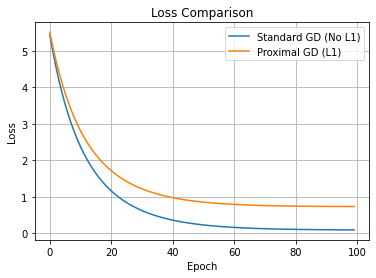

In [163]:
# Plot comparison
plt.plot(losses_gd, label='Standard GD (No L1)')
plt.plot(losses_prox, label='Proximal GD (L1)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Comparison')
plt.legend()
plt.grid(True)
plt.show()